# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>

# Importing Libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

from collections import Counter
from prettytable import PrettyTable

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

## Loading data

In [2]:
project_data = pd.read_csv('train_data.csv', nrows = 80000)
resource_data =pd.read_csv('resources.csv', nrows = 80000)

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (80000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
print(resource_data.head(2))

Number of data points in train data (80000, 4)
['id' 'description' 'quantity' 'price']
        id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95  


In [5]:
project_data.isnull().any()

Unnamed: 0                                      False
id                                              False
teacher_id                                      False
teacher_prefix                                   True
school_state                                    False
project_submitted_datetime                      False
project_grade_category                          False
project_subject_categories                      False
project_subject_subcategories                   False
project_title                                   False
project_essay_1                                 False
project_essay_2                                 False
project_essay_3                                  True
project_essay_4                                  True
project_resource_summary                        False
teacher_number_of_previously_posted_projects    False
project_is_approved                             False
dtype: bool

In [6]:
project_data['teacher_prefix']= project_data['teacher_prefix'].fillna(project_data['teacher_prefix'].mode().iloc[0])

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

## preprocessing subject category

In [8]:
categories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## preprocessing subject subcategory

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## preprocessing teacher prefix

In [10]:
prefix = list(project_data['teacher_prefix'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

prefix_list = []
for i in prefix:
    temp = ""
    if "." in i:
        i = i.replace('.','')
        temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
    prefix_list.append(temp.strip())

project_data['teachers_prefix'] = prefix_list
project_data.drop(['teacher_prefix'],inplace = True,axis = 1)    

## preprocessing project grade category

In [11]:
grade_categories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_categories:
    temp = ""
    if "-" in i:
        i = i.replace('-','_')
        i = i.replace(' ','_')
        temp +=i.strip()+' '#" abc ".strip() will return "abc", remove the trailing spaces
    grade_cat_list.append(temp.strip())

project_data['grade_category'] = grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True) 

In [12]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved','Unnamed: 0','teacher_id','project_submitted_datetime'], axis=1)
X.head(1)

id school_state                                     project_title  \
0  p253737           IN  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  \
0                                             0   

                                               essay   clean_categories  \
0  My students are English learners that are work...  Literacy_Language   

  clean_subcategories teachers_prefix grade_category  
0        ESL Literacy             Mrs  Grades_PreK_2

# Spliting the data into train and test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

# Text preprocessing
###   For Essay

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_train_essay = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_train_essay.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 35912/35912 [00:37<00:00, 965.57it/s]


In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_cv_essay = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_cv_essay.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 17688/17688 [00:17<00:00, 998.56it/s]


In [21]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_test_essay = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_test_essay.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 26400/26400 [00:26<00:00, 986.50it/s]


### For Title

In [22]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_train_title = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_train_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 35912/35912 [00:01<00:00, 20932.96it/s]


In [23]:
preprocessed_cv_title = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_cv_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 17688/17688 [00:00<00:00, 21253.57it/s]


In [24]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_test_title = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_test_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 26400/26400 [00:01<00:00, 20929.44it/s]


# One hot encoding
### Categories

In [25]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vec1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), binary=True)
X_train_cat_ohe = vec1.fit_transform(X_train['clean_categories'].values)
X_cv_cat_ohe = vec1.transform(X_cv['clean_categories'].values)
X_test_cat_ohe = vec1.transform(X_test['clean_categories'].values)

print("After Vectorizations")
print("Shape of X_train after one hot encodig ",X_train_cat_ohe.shape, y_train.shape)
print("Shape of X_cv after one hot encodig ",X_cv_cat_ohe.shape, y_cv.shape)
print("Shape of X_test after one hot encodig ",X_test_cat_ohe.shape, y_test.shape)

After Vectorizations
Shape of X_train after one hot encodig  (35912, 9) (35912,)
Shape of X_cv after one hot encodig  (17688, 9) (17688,)
Shape of X_test after one hot encodig  (26400, 9) (26400,)


### Subcategories

In [26]:
vec2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), binary=True)
X_train_sub_cat_ohe = vec2.fit_transform(X_train['clean_subcategories'].values)
X_cv_sub_cat_ohe = vec2.transform(X_cv['clean_subcategories'].values)
X_test_sub_cat_ohe = vec2.transform(X_test['clean_subcategories'].values)

print("After Vectorizations")
print("Shape of X_train after one hot encodig ",X_train_sub_cat_ohe.shape, y_train.shape)
print("Shape of X_cv after one hot encodig ",X_cv_sub_cat_ohe.shape, y_cv.shape)
print("Shape of X_test after one hot encodig ",X_test_sub_cat_ohe.shape, y_test.shape)

After Vectorizations
Shape of X_train after one hot encodig  (35912, 30) (35912,)
Shape of X_cv after one hot encodig  (17688, 30) (17688,)
Shape of X_test after one hot encodig  (26400, 30) (26400,)


### School state

In [27]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
school_dict = dict(my_counter)
sorted_school_dict = dict(sorted(school_dict.items(), key=lambda kv: kv[1]))


In [28]:
vec3 = CountVectorizer(vocabulary=list(sorted_school_dict.keys()), binary=True)
X_train_state_ohe = vec3.fit_transform(X_train['school_state'].values)
X_cv_state_ohe = vec3.transform(X_cv['school_state'].values)
X_test_state_ohe = vec3.transform(X_test['school_state'].values)

print("After vectorizations")
print("Shape of X_train after one hot encodig ",X_train_state_ohe.shape, y_train.shape)
print("Shape of X_cv after one hot encodig ",X_cv_state_ohe.shape, y_cv.shape)
print("Shape of X_test after one hot encodig ",X_test_state_ohe.shape, y_test.shape)

After vectorizations
Shape of X_train after one hot encodig  (35912, 51) (35912,)
Shape of X_cv after one hot encodig  (17688, 51) (17688,)
Shape of X_test after one hot encodig  (26400, 51) (26400,)


### teacher prefix

In [29]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['teachers_prefix'].values:
    my_counter.update(str(word).split())
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))

In [30]:
vec4 = CountVectorizer(vocabulary=list(sorted_teacher_dict.keys()), binary=True)
X_train_teacher_ohe = vec4.fit_transform(X_train['teachers_prefix'].values) # fit has to happen only on train data
X_cv_teacher_ohe = vec4.transform(X_cv['teachers_prefix'].values)
X_test_teacher_ohe = vec4.transform(X_test['teachers_prefix'].values)

print("After vectorizations")
print("Shape of X_train after one hot encodig ",X_train_teacher_ohe.shape, y_train.shape)
print("Shape of X_cv after one hot encodig ",X_cv_teacher_ohe.shape, y_cv.shape)
print("Shape of X_test after one hot encodig ",X_test_teacher_ohe.shape, y_test.shape)

After vectorizations
Shape of X_train after one hot encodig  (35912, 4) (35912,)
Shape of X_cv after one hot encodig  (17688, 4) (17688,)
Shape of X_test after one hot encodig  (26400, 4) (26400,)


### Project grade category

In [31]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['grade_category'].values:
    my_counter.update(str(word).split())
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

In [32]:
vec5 = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), binary=True)
X_train_grade_ohe = vec5.fit_transform(X_train['grade_category'].values) # fit has to happen only on train data
X_cv_grade_ohe = vec5.transform(X_cv['grade_category'].values)
X_test_grade_ohe = vec5.transform(X_test['grade_category'].values)

In [33]:
print('After Vectorizations')
print("Shape of X_train after one hot encodig ",X_train_grade_ohe.shape, y_train.shape)
print("Shape of X_cv after one hot encodig ",X_cv_grade_ohe.shape, y_cv.shape)
print("Shape of X_test after one hot encodig ",X_test_grade_ohe.shape, y_test.shape)

After Vectorizations
Shape of X_train after one hot encodig  (35912, 4) (35912,)
Shape of X_cv after one hot encodig  (17688, 4) (17688,)
Shape of X_test after one hot encodig  (26400, 4) (26400,)


## Bag of words on essay

In [34]:
vec6 = CountVectorizer(min_df=10)
 
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vec6.fit_transform(preprocessed_train_essay)# fit has to happen only on train data
X_cv_essay_bow = vec6.transform(preprocessed_cv_essay)
X_test_essay_bow = vec6.transform(preprocessed_test_essay)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)


After vectorizations
(35912, 10608) (35912,)
(17688, 10608) (17688,)
(26400, 10608) (26400,)


## Bag of words on title

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec7 = CountVectorizer(min_df=10)
 
# fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vec7.fit_transform(preprocessed_train_title)
X_cv_title_bow = vec7.transform(preprocessed_cv_title)
X_test_title_bow = vec7.transform(preprocessed_test_title)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)

After vectorizations
(35912, 1646) (35912,)
(17688, 1646) (17688,)
(26400, 1646) (26400,)


## tfidf on essay

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec8 = TfidfVectorizer(min_df=10)

# fit has to happen only on train data
X_train_ess_tfidf = vec8.fit_transform(preprocessed_train_essay)

# we use the fitted Tfidf Vectorizer to convert the text to vector
X_cv_ess_tfidf = vec8.transform(preprocessed_cv_essay)
X_test_ess_tfidf = vec8.transform(preprocessed_test_essay)

print("After vectorizations")
print(X_train_ess_tfidf.shape, y_train.shape)
print(X_cv_ess_tfidf.shape, y_cv.shape)
print(X_test_ess_tfidf.shape, y_test.shape)

After vectorizations
(35912, 10608) (35912,)
(17688, 10608) (17688,)
(26400, 10608) (26400,)


## tfidf on title

In [37]:
vec9 = TfidfVectorizer(min_df=10)
X_train_title_tfidf = vec9.fit_transform(preprocessed_train_title)

# we use the fitted Tfidf Vectorizer to convert the text to vector
X_cv_title_tfidf = vec9.transform(preprocessed_cv_title)
X_test_title_tfidf = vec9.transform(preprocessed_test_title)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)

After vectorizations
(35912, 1646) (35912,)
(17688, 1646) (17688,)
(26400, 1646) (26400,)


# Loading glove file

In [38]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
# Output:
    
# Loading Glove Model
# 1917495it [06:32, 4879.69it/s]
# Done. 1917495  words loaded!

# ============================




336it [00:00, 3287.52it/s]

Loading Glove Model


1917494it [08:53, 3591.51it/s]

Done. 1917494  words loaded!


In [39]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# Using Pretrained Models: TFIDF weighted W2V 

### on essay

In [40]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_train_essay)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_ess = set(tfidf_model.get_feature_names())

In [41]:
# compute average word2vec for each review.
def func(wordlist):
    
    train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(wordlist): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length    # we are taking the 300 dimensions  very large
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        train_tfidf_w2v_vectors.append(vector)
    
    print(len(train_tfidf_w2v_vectors))
    print(len(train_tfidf_w2v_vectors[0]))
    return train_tfidf_w2v_vectors

In [42]:
#For essays
X_train_tfidf_w2v_ess =func(preprocessed_train_essay)
X_test_tfidf_w2v_ess =func(preprocessed_test_essay)
X_cv_tfidf_w2v_ess =func(preprocessed_cv_essay)

  1%|█                                                                           | 364/26400 [00:00<00:15, 1714.69it/s]

35912
300


  2%|█▌                                                                          | 365/17688 [00:00<00:09, 1827.54it/s]

26400
300


100%|██████████████████████████████████████████████████████████████████████████| 17688/17688 [00:09<00:00, 1914.54it/s]

17688
300


# on title

In [43]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_train_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

In [44]:
# For Titles
X_train_tfidf_w2v_title=func(preprocessed_train_title)
X_test_tfidf_w2v_title=func(preprocessed_test_title)
X_cv_tfidf_w2v_title=func(preprocessed_cv_title)

  8%|██████▏                                                                   | 2188/26400 [00:00<00:01, 21043.56it/s]

35912
300


 15%|██████████▉                                                               | 2603/17688 [00:00<00:00, 25034.91it/s]

26400
300


100%|█████████████████████████████████████████████████████████████████████████| 17688/17688 [00:00<00:00, 29885.83it/s]

17688
300


# price

In [45]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head()

id   price  quantity
0  p000027  782.13        15
1  p000031  357.98         2
2  p000052  114.98         2
3  p000147   13.13        25
4  p000153  304.93        41

In [46]:
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head()

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0           AZ   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           KY   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           TX   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   
2        2016-08-31 12:03:56   
3        2016-10-06 21:16:17   
4        2016-07-11 01:10:09   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

  teachers_prefix grade_category  price  quantity  
0             Mrs  Grades_PreK_2    NaN       NaN  
1              Mr     Grades_6_8    NaN       NaN  
2              Ms     Grades_6_8    NaN       NaN  
3             Mrs  Grades_PreK_2    NaN       NaN  
4             Mrs  Grades_PreK_2    NaN       NaN

In [47]:
X_train =pd.merge(X_train,price_data, how ='left', on = 'id')
X_cv =pd.merge(X_cv,price_data, how ='left', on ='id')
X_test = pd.merge(X_test,price_data,how ='left',on='id')

In [48]:
# https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas
#replacing nan with most frequently occuring element
X_train['price'] = X_train['price'].fillna(X_train['price'].mode().iloc[0])
X_cv['price'] = X_cv['price'].fillna(X_train['price'].mode().iloc[0])
X_test['price'] = X_test['price'].fillna(X_test['price'].mode().iloc[0])
print(X_train['price'].isnull().sum())
print(X_cv['price'].isnull().sum())
print(X_test['price'].isnull().sum())

0
0
0


## Standardizing price, quantity, previous projects

In [49]:
# price
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()

X_train_price_stndrd = price_scalar.fit_transform(X_train['price'].values.reshape(1,-1))
X_cv_price_stndrd = price_scalar.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_stndrd = price_scalar.transform(X_test['price'].values.reshape(1,-1))

In [50]:
X_train_price_stndrd = X_train_price_stndrd.reshape(-1,1)
X_cv_price_stndrd = X_cv_price_stndrd.reshape(-1,1)
X_test_price_stndrd = X_test_price_stndrd.reshape(-1,1)

In [51]:
X_train_price_stndrd 

array([[0.00422366],
       [0.00422366],
       [0.00422366],
       ...,
       [0.00422366],
       [0.00422366],
       [0.00422366]])

In [52]:
X_cv_price_stndrd

array([[0.00634511],
       [0.00634511],
       [0.00634511],
       ...,
       [0.00634511],
       [0.00634511],
       [0.00634511]])

In [53]:
X_test_price_stndrd

array([[0.00594676],
       [0.00594676],
       [0.00594676],
       ...,
       [0.00594676],
       [0.00594676],
       [0.00594676]])

# quantity

In [54]:
# https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas
#replacing nan with most frequently occuring element

X_train['quantity'] = X_train['quantity'].fillna(X_train['quantity'].mode().iloc[0])
X_cv['quantity'] = X_cv['quantity'].fillna(X_cv['quantity'].mode().iloc[0])
X_test['quantity'] = X_test['quantity'].fillna(X_test['quantity'].mode().iloc[0])

In [55]:
# quantity
quantity_scalar = Normalizer()
X_train_quantity_stndrd = quantity_scalar.fit_transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_stndrd = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_stndrd = quantity_scalar.transform(X_test['quantity'].values.reshape(-1,1))

In [56]:
X_train_quantity_stndrd = X_train_quantity_stndrd.reshape(-1,1)
X_cv_quantity_stndrd = X_cv_quantity_stndrd.reshape(-1,1)
X_test_quantity_stndrd = X_test_quantity_stndrd.reshape(-1,1)

In [57]:
X_train_quantity_stndrd

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [58]:
X_cv_quantity_stndrd

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [59]:
X_test_quantity_stndrd

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [60]:
# https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas
#replacing nan with most frequently occuring element

X_train['teacher_number_of_previously_posted_projects'] = X_train['teacher_number_of_previously_posted_projects'].fillna(X_train['teacher_number_of_previously_posted_projects'].mode().iloc[0])
X_cv['teacher_number_of_previously_posted_projects'] = X_cv['teacher_number_of_previously_posted_projects'].fillna(X_cv['teacher_number_of_previously_posted_projects'].mode().iloc[0])
X_test['teacher_number_of_previously_posted_projects'] = X_test['teacher_number_of_previously_posted_projects'].fillna(X_test['teacher_number_of_previously_posted_projects'].mode().iloc[0])

In [61]:
# previous_year_projects
price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above mean and variance.
X_train_prev_proj_stndrd =price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# Now standardize the data with above mean and variance.
X_test_prev_proj_stndrd =price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# Now standardize the data with above mean and variance.
X_cv_prev_proj_stndrd = price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [62]:
X_train_prev_proj_stndrd = X_train_prev_proj_stndrd.reshape(-1,1)
X_cv_prev_proj_stndrd = X_cv_prev_proj_stndrd.reshape(-1,1)
X_test_prev_proj_stndrd = X_test_prev_proj_stndrd.reshape(-1,1)

In [63]:
X_train_prev_proj_stndrd

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [64]:
X_cv_prev_proj_stndrd

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [65]:
X_test_prev_proj_stndrd

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

## Number of words in title

In [66]:
# For train data
title_length_train=[]
for i in range(0,len(X_train)):
    title_length_train.append(len(X_train["project_title"][i].split()))

title_length_train=np.array(title_length_train)
X_train['title_length'] = title_length_train

#for test data titles
title_length_test=[]
for i in range(0,len(X_test)):
    title_length_test.append(len(X_test["project_title"][i].split()))
X_test['title_length'] = title_length_test

title_length_test=np.array(title_length_test)

#for cv data titles
title_length_cv=[]
for i in range(0,len(X_cv)):
    title_length_cv.append(len(X_cv["project_title"][i].split()))

title_length_cv=np.array(title_length_cv)
X_cv['title_length'] = title_length_cv

In [67]:
# title
title_scalar = StandardScaler()
X_train_title_stndrd = title_scalar.fit_transform(X_train['title_length'].values.reshape(-1,1))
X_cv_title_stndrd = title_scalar.transform(X_cv['title_length'].values.reshape(-1,1))
X_test_title_stndrd = title_scalar.transform(X_test['title_length'].values.reshape(-1,1))

## Number of words in essay

In [68]:
# For train data
essay_length_train=[]
for i in range(0,len(X_train)):
    essay_length_train.append(len(X_train["essay"][i].split()))

essay_length_train=np.array(essay_length_train)
X_train['essay_length'] = essay_length_train

#for test data essays
essay_length_test=[]
for i in range(0,len(X_test)):
    essay_length_test.append(len(X_test["essay"][i].split()))
X_test['essay_length'] = essay_length_test

essay_length_test=np.array(essay_length_test)

#for cv data essays
essay_length_cv=[]
for i in range(0,len(X_cv)):
    essay_length_cv.append(len(X_cv["essay"][i].split()))

essay_length_cv=np.array(essay_length_cv)
X_cv['essay_length'] = essay_length_cv

In [69]:
# essay
essay_scalar = StandardScaler()
X_train_essay_stndrd = essay_scalar.fit_transform(X_train['essay_length'].values.reshape(-1,1))
X_cv_essay_stndrd = essay_scalar.transform(X_cv['essay_length'].values.reshape(-1,1))
X_test_essay_stndrd = essay_scalar.transform(X_test['essay_length'].values.reshape(-1,1))

## Sentimental scores

In [70]:
# http://t-redactyl.io/blog/2017/04/applying-sentiment-analysis-with-vader-and-the-twitter-api.html
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

tr_compound = []
tr_pos = []
tr_neu = []
tr_neg = []

analyzer = SentimentIntensityAnalyzer()

for i in tqdm(X_train['essay']):
    tr_pos.append(analyzer.polarity_scores(i)['pos'])
    tr_neg.append(analyzer.polarity_scores(i)['neg'])
    tr_neu.append(analyzer.polarity_scores(i)['neu'])
    tr_compound.append(analyzer.polarity_scores(i)['compound'])
X_train['pos'] = tr_pos
X_train['neg'] = tr_neg
X_train['neu'] = tr_neu
X_train['comp'] = tr_compound

C:\Users\SUBHODAYA KUMAR\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|████████████████████████████████████████████████████████████████████████████| 35912/35912 [16:55<00:00, 35.35it/s]


In [71]:
# http://t-redactyl.io/blog/2017/04/applying-sentiment-analysis-with-vader-and-the-twitter-api.html
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

ts_compound = []
ts_pos = []
ts_neu = []
ts_neg = []

analyzer = SentimentIntensityAnalyzer()

for i in tqdm(X_test['essay']):
    ts_pos.append(analyzer.polarity_scores(i)['pos'])
    ts_neg.append(analyzer.polarity_scores(i)['neg'])
    ts_neu.append(analyzer.polarity_scores(i)['neu'])
    ts_compound.append(analyzer.polarity_scores(i)['compound'])
X_test['pos'] = ts_pos
X_test['neg'] = ts_neg
X_test['neu'] = ts_neu
X_test['comp'] = ts_compound

100%|████████████████████████████████████████████████████████████████████████████| 26400/26400 [09:56<00:00, 44.27it/s]


In [72]:
cv_compound = []
cv_pos = []
cv_neu = []
cv_neg = []
for i in tqdm(X_cv['essay']):
    cv_pos.append(analyzer.polarity_scores(i)['pos'])
    cv_neg.append(analyzer.polarity_scores(i)['neg'])
    cv_neu.append(analyzer.polarity_scores(i)['neu'])
    cv_compound.append(analyzer.polarity_scores(i)['compound'])
X_cv['pos'] = cv_pos
X_cv['neg'] = cv_neg
X_cv['neu'] = cv_neu
X_cv['comp'] = cv_compound

100%|████████████████████████████████████████████████████████████████████████████| 17688/17688 [06:40<00:00, 44.20it/s]


In [73]:
# positive
pos_scalar = StandardScaler()
X_train_pos_stndrd = pos_scalar.fit_transform(X_train['pos'].values.reshape(-1,1))
X_cv_pos_stndrd = pos_scalar.transform(X_cv['pos'].values.reshape(-1,1))
X_test_pos_stndrd = pos_scalar.transform(X_test['pos'].values.reshape(-1,1))

In [74]:
# negative
neg_scalar = StandardScaler()
X_train_neg_stndrd = neg_scalar.fit_transform(X_train['neg'].values.reshape(-1,1))
X_cv_neg_stndrd = neg_scalar.transform(X_cv['neg'].values.reshape(-1,1))
X_test_neg_stndrd = neg_scalar.transform(X_test['neg'].values.reshape(-1,1))

In [75]:
# neutral
neu_scalar = StandardScaler()
X_train_neu_stndrd = neu_scalar.fit_transform(X_train['neu'].values.reshape(-1,1))
X_cv_neu_stndrd = neu_scalar.transform(X_cv['neu'].values.reshape(-1,1))
X_test_neu_stndrd = neu_scalar.transform(X_test['neu'].values.reshape(-1,1))

In [76]:
# compound
comp_scalar = StandardScaler()
X_train_comp_stndrd = comp_scalar.fit_transform(X_train['comp'].values.reshape(-1,1))
X_cv_comp_stndrd = comp_scalar.transform(X_cv['comp'].values.reshape(-1,1))
X_test_comp_stndrd = comp_scalar.transform(X_test['comp'].values.reshape(-1,1))

In [77]:
X_train.head()

id school_state                                      project_title  \
0  p166185           TX                          POP POP IT'S SHOW TIME!!!   
1  p206708           FL                 Mindful Thinking Mosaic Art Garden   
2  p051600           IL  Fun and Flexible Seating for a Special Educati...   
3  p139071           CT                          NO MORE DUSTY CHALKBOARD!   
4  p201597           OK                     Movement and Learning \"R\" 1!   

                                     project_essay_1  \
0  My students are 21st century learners that mea...   
1  With the new language our district wants to sp...   
2  I am a Special Education teacher with about 12...   
3  A typical day in my classroom is a busy one fu...   
4  My students have many things in common and  th...   

                                     project_essay_2  \
0  Help!!!!! \r\nWe are in desperate need of a sm...   
1  My donors choose Mosaic stepping stone project...   
2  The use of flexible seating options will not o...   
3  My students are a wonderful bunch of First Gra...   
4  In my years of teaching, I have noticed more a...   

                                     project_essay_3  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  In my classroom everyone is a teacher. Student...   
4                                                NaN   

                                     project_essay_4  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Funding my project would make a world of diffe...   
4                                                NaN   

                            project_resource_summary  \
0  My students need a 21st century classroom that...   
1  My students need a space to play and achieve m...   
2  My students need flexible seating options, han...   
3  My students need a mounted magnetic dry erase ...   
4  My students need a variety of opportunities to...   

   teacher_number_of_previously_posted_projects  \
0                                            57   
1                                             3   
2                                             0   
3                                             0   
4                                             4   

                                               essay  ... teachers_prefix  \
0  My students are 21st century learners that mea...  ...              Ms   
1  With the new language our district wants to sp...  ...              Ms   
2  I am a Special Education teacher with about 12...  ...              Ms   
3  A typical day in my classroom is a busy one fu...  ...             Mrs   
4  My students have many things in common and  th...  ...             Mrs   

  grade_category   price quantity  title_length  essay_length    pos    neg  \
0     Grades_3_5  149.99      1.0             5           256  0.090  0.053   
1  Grades_PreK_2  149.99      1.0             5           185  0.096  0.027   
2     Grades_3_5  149.99      1.0             9           228  0.246  0.057   
3  Grades_PreK_2  444.99      2.0             4           462  0.185  0.022   
4  Grades_PreK_2  149.99      1.0             5           198  0.262  0.000   

     neu    comp  
0  0.857  0.8663  
1  0.877  0.9077  
2  0.697  0.9938  
3  0.792  0.9979  
4  0.738  0.9949  

[5 rows x 22 columns]

In [78]:
print(X_train_cat_ohe.shape)
print(X_train_sub_cat_ohe.shape)
print(X_train_state_ohe.shape)
print(X_train_teacher_ohe.shape)
print(X_train_grade_ohe.shape)
print(X_train_ess_tfidf.shape)
print(X_train_title_tfidf.shape)
print(X_train_price_stndrd.shape)
print(X_train_quantity_stndrd.shape)
print(X_train_prev_proj_stndrd.shape)
print(X_train_essay_stndrd.shape)
print(X_train_title_stndrd.shape)
print(X_train_pos_stndrd.shape)
print(X_train_neg_stndrd.shape)
print(X_train_neu_stndrd.shape)
print(X_train_comp_stndrd.shape)

(35912, 9)
(35912, 30)
(35912, 51)
(35912, 4)
(35912, 4)
(35912, 10608)
(35912, 1646)
(35912, 1)
(35912, 1)
(35912, 1)
(35912, 1)
(35912, 1)
(35912, 1)
(35912, 1)
(35912, 1)
(35912, 1)


## Concatenating all the features

In [79]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx
X_train_tfidf = hstack((X_train_title_tfidf,X_train_ess_tfidf,X_train_teacher_ohe,X_train_cat_ohe,X_train_sub_cat_ohe, X_train_grade_ohe,
                        X_train_state_ohe,X_train_price_stndrd, X_train_quantity_stndrd, X_train_prev_proj_stndrd,
                        X_train_pos_stndrd, X_train_neg_stndrd, X_train_neu_stndrd, X_train_comp_stndrd, X_train_essay_stndrd, X_train_title_stndrd)).tocsr()



In [80]:
X_train_tfidf

<35912x12361 sparse matrix of type '<class 'numpy.float64'>'
	with 4010821 stored elements in Compressed Sparse Row format>

In [81]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx
X_cv_tfidf = hstack((X_cv_title_tfidf,X_cv_ess_tfidf,X_cv_teacher_ohe,X_cv_cat_ohe,X_cv_sub_cat_ohe,X_cv_grade_ohe,
                     X_cv_state_ohe,X_cv_price_stndrd, X_cv_quantity_stndrd, X_cv_prev_proj_stndrd,
                     X_cv_pos_stndrd, X_cv_neg_stndrd, X_cv_neu_stndrd, X_cv_comp_stndrd, X_cv_essay_stndrd, X_cv_title_stndrd)).tocsr()


In [82]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx
X_test_tfidf = hstack((X_test_title_tfidf,X_test_ess_tfidf,X_test_teacher_ohe,X_test_cat_ohe,X_test_sub_cat_ohe,
                      X_test_grade_ohe,X_test_state_ohe,X_test_price_stndrd, X_test_quantity_stndrd, X_test_prev_proj_stndrd,
                       X_test_pos_stndrd, X_test_neg_stndrd, X_test_neu_stndrd, X_test_comp_stndrd, X_test_essay_stndrd, X_test_title_stndrd)).tocsr()


In [83]:
print('Final data matrix')
print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

Final data matrix
(35912, 12361) (35912,)
(17688, 12361) (17688,)
(26400, 12361) (26400,)


In [84]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx  
X_train_tfidf_w2v = hstack((X_train_tfidf_w2v_ess,X_train_tfidf_w2v_title,X_train_teacher_ohe,X_train_cat_ohe,X_train_sub_cat_ohe,
                      X_train_grade_ohe,X_train_state_ohe,X_train_price_stndrd, X_train_quantity_stndrd, X_train_prev_proj_stndrd,
                           X_train_pos_stndrd, X_train_neg_stndrd, X_train_neu_stndrd, X_train_comp_stndrd, X_train_essay_stndrd, X_train_title_stndrd)).tocsr().toarray()


In [85]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx  
X_cv_tfidf_w2v = hstack((X_cv_tfidf_w2v_ess,X_cv_tfidf_w2v_title,X_cv_teacher_ohe,X_cv_cat_ohe,X_cv_sub_cat_ohe,
                      X_cv_grade_ohe,X_cv_state_ohe,X_cv_price_stndrd, X_cv_quantity_stndrd, X_cv_prev_proj_stndrd,
                        X_cv_pos_stndrd, X_cv_neg_stndrd, X_cv_neu_stndrd, X_cv_comp_stndrd, X_cv_essay_stndrd, X_cv_title_stndrd)).tocsr()


In [86]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx  
X_test_tfidf_w2v = hstack((X_test_tfidf_w2v_ess,X_test_tfidf_w2v_title,X_test_teacher_ohe,X_test_cat_ohe,X_test_sub_cat_ohe,
                      X_test_grade_ohe,X_test_state_ohe,X_test_price_stndrd, X_test_quantity_stndrd, X_test_prev_proj_stndrd,
                          X_test_pos_stndrd, X_test_neg_stndrd, X_test_neu_stndrd, X_test_comp_stndrd, X_test_essay_stndrd, X_test_title_stndrd)).tocsr()


In [87]:
print('Final data matrix')
print(X_train_tfidf_w2v.shape, y_train.shape)
print(X_cv_tfidf_w2v.shape, y_cv.shape)
print(X_test_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final data matrix
(35912, 707) (35912,)
(17688, 707) (17688,)
(26400, 707) (26400,)


# DT on tfidf featurization

In [88]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [89]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import math

random_grid = {'max_depth': [1,5,10,50],
               'min_samples_split': [5,10,100,500]}

dt = DecisionTreeClassifier( class_weight='balanced')
clf = GridSearchCV(estimator = dt, param_grid = random_grid, cv = 10, return_train_score=True, scoring = 'roc_auc', n_jobs = -1,verbose =2)
clf.fit(X_train_tfidf, y_train)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 16.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'m

In [90]:
clf.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [91]:
train_auc= clf.cv_results_['mean_train_score']
train_auc

array([0.55128562, 0.55128562, 0.55128562, 0.55128562, 0.629879  ,
       0.62982441, 0.62892896, 0.62512439, 0.72851274, 0.72691312,
       0.71108514, 0.6876327 , 0.98570471, 0.97930134, 0.91732712,
       0.82071625])

In [92]:
cv_auc = clf.cv_results_['mean_test_score']
cv_auc

array([0.5479956 , 0.5479956 , 0.5479956 , 0.5479956 , 0.59993609,
       0.59937512, 0.60000247, 0.60070297, 0.60886183, 0.60973547,
       0.61026574, 0.61936263, 0.54870309, 0.55252687, 0.56896251,
       0.60071749])

In [93]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

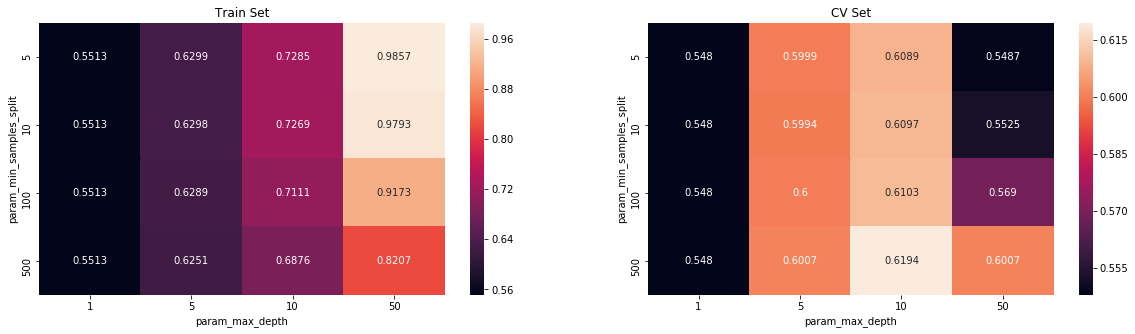

In [94]:
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [95]:
clf.best_score_

0.6193626256846032

## Hyperparameter tuning

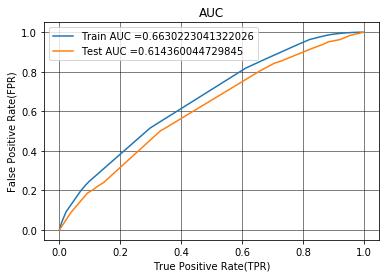

In [96]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


dt = DecisionTreeClassifier(max_depth = 10, min_samples_split= 500)
dt.fit(X_train_tfidf ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dt, X_train_tfidf)    
y_test_pred = batch_predict(dt, X_test_tfidf)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### best threshold

In [97]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## Confusion matrix

In [98]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print('='*100)

the maximum value of tpr*(1-fpr) 0.3621354737767973 for threshold 0.873
Train confusion matrix
[[ 3811  1632]
 [14710 15759]]
Test confusion matrix
[[ 2640  1362]
 [11016 11382]]


Text(0.5, 1, 'Confusion Matrix')

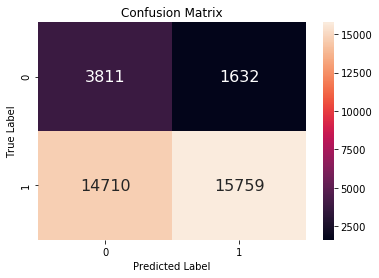

In [99]:
#stackoverflow.com/questions/54018742/valueerror-classification-metrics-cant-handle-a-mix-of-unknown-and-binary-targ
matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(matrix, annot=True, annot_kws={'size':16}, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

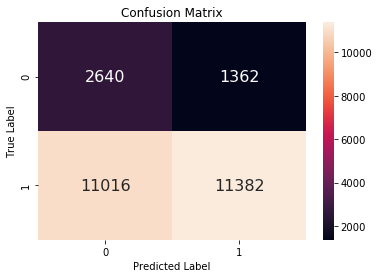

In [100]:
#stackoverflow.com/questions/54018742/valueerror-classification-metrics-cant-handle-a-mix-of-unknown-and-binary-targ
matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(matrix, annot=True, annot_kws={'size':16}, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [101]:
tfidf_features_names = []

for a in vec1.get_feature_names() :
    tfidf_features_names.append(a)
    
for a in vec2.get_feature_names() :
    tfidf_features_names.append(a)
    
for a in vec3.get_feature_names() :
    tfidf_features_names.append(a)
    
for a in vec4.get_feature_names() :
    tfidf_features_names.append(a)
    
for a in vec5.get_feature_names() :
    tfidf_features_names.append(a)
    
tfidf_features_names.append("price")
tfidf_features_names.append("quantity")
tfidf_features_names.append("teacher_number_of_previously_posted")
tfidf_features_names.append("essay_length")
tfidf_features_names.append("essay_title")
tfidf_features_names.append("pos")
tfidf_features_names.append("neg")
tfidf_features_names.append("neu")
tfidf_features_names.append("comp")

for a in vec6.get_feature_names() :
    tfidf_features_names.append(a)

for a in vec7.get_feature_names() :
    tfidf_features_names.append(a)
    
len(tfidf_features_names)

12361

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
# ! pip install pydotplus
# !pip install graphviz

In [104]:
#https://pythonprogramminglanguage.com/decision-tree-visual-example/

import pydotplus
import graphviz
from sklearn import tree
import collections

# Visualize data
dot_data = tree.export_graphviz(dtree,
                                feature_names=tfidf_features_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

## Word cloud

In [105]:
fp = []
for i in range(len(y_test)):
    if(y_test[i] == 0) and (y_test_pred[i] <= 1) :
        fp.append(i)

In [106]:
fp[0:5]

[11, 23, 32, 37, 45]

In [107]:
fp_essay =[]
for i in fp:
    fp_essay.append(X_test['essay'].values[i])

In [108]:
fp_essay[0]

'My district is responsible for creating an individualized learning community within my campus. We piloted this unique program last school year. The WIN Academy was created to help us succeed. I proud to say my classroom and I have been part of this program since we began. \\r\\nMy class consists of 100% Tier 3, at-risk scholars, who depend on differentiated instruction 100% of the time at levels. We became a family and continue to work as one. We will continue to make our district part by showing that we will WIN.Our WINners, at our campus are considered 100% at-risk and range from being 1-2 grade levels behind. My third graders are one in four classrooms with this demographic. Technological tools, like these wireless headphones, help a lot in helping our scholars improve.  My scholars are also English Language Learners (ELLs).  When this station is used with grade level books. my scholars are learning the English language, understanding it, and making sure they are prepared for certa

In [109]:
len(fp_essay)

4002

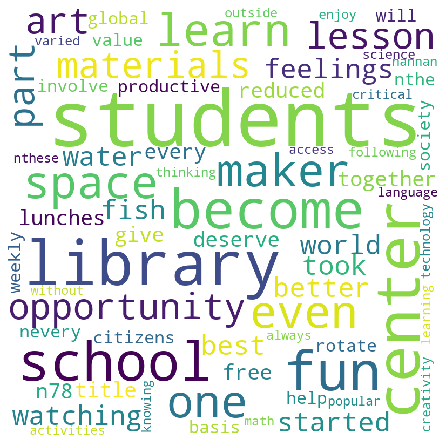

In [110]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## box plot with the price of false positive data points

In [111]:
fp_price=[]
for i in fp:
    fp_price.append(X_test['price'].values[i])

In [112]:
fp_price[0:2]

[299.99, 299.99]

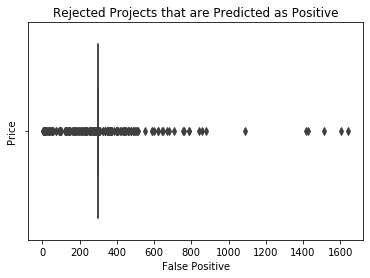

In [113]:
plt.xlabel("False Positive")
plt.ylabel("Price")
plt.title("Rejected Projects that are Predicted as Positive")
sns.boxplot(fp_price)
plt.show()

## pdf of the teacher_number_of_previously_posted_projects with false positive data points

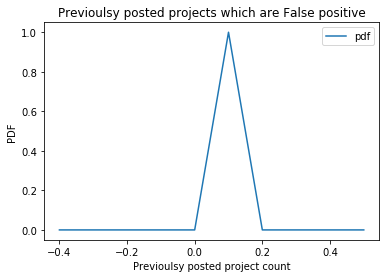

In [114]:
count,bin_edges=np.histogram(X_test['teacher_number_of_previously_posted_projects'].values[i],bins=10,density=True)

#pdf
pdf=count/(sum(count))

p=plt.plot(bin_edges[1:],pdf,label='pdf')

plt.ylabel('PDF')
plt.xlabel('Previoulsy posted project count')
plt.legend()
plt.title('Previoulsy posted projects which are False positive')
plt.show()


# top 5000 features from tfidf

In [115]:
dt = DecisionTreeClassifier( max_depth= None, max_features=5000, class_weight='balanced')
dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=5000, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [116]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# get importance
imp = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(imp):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00055
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

Feature: 1263, Score: 0.00000
Feature: 1264, Score: 0.00000
Feature: 1265, Score: 0.00000
Feature: 1266, Score: 0.00000
Feature: 1267, Score: 0.00000
Feature: 1268, Score: 0.00000
Feature: 1269, Score: 0.00000
Feature: 1270, Score: 0.00000
Feature: 1271, Score: 0.00000
Feature: 1272, Score: 0.00000
Feature: 1273, Score: 0.00013
Feature: 1274, Score: 0.00000
Feature: 1275, Score: 0.00000
Feature: 1276, Score: 0.00000
Feature: 1277, Score: 0.00000
Feature: 1278, Score: 0.00000
Feature: 1279, Score: 0.00000
Feature: 1280, Score: 0.00000
Feature: 1281, Score: 0.00000
Feature: 1282, Score: 0.00000
Feature: 1283, Score: 0.00000
Feature: 1284, Score: 0.00006
Feature: 1285, Score: 0.00000
Feature: 1286, Score: 0.00000
Feature: 1287, Score: 0.00000
Feature: 1288, Score: 0.00000
Feature: 1289, Score: 0.00000
Feature: 1290, Score: 0.00000
Feature: 1291, Score: 0.00000
Feature: 1292, Score: 0.00000
Feature: 1293, Score: 0.00000
Feature: 1294, Score: 0.00000
Feature: 1295, Score: 0.00000
Feature: 1

Feature: 1890, Score: 0.00000
Feature: 1891, Score: 0.00034
Feature: 1892, Score: 0.00000
Feature: 1893, Score: 0.00000
Feature: 1894, Score: 0.00006
Feature: 1895, Score: 0.00000
Feature: 1896, Score: 0.00000
Feature: 1897, Score: 0.00000
Feature: 1898, Score: 0.00000
Feature: 1899, Score: 0.00000
Feature: 1900, Score: 0.00000
Feature: 1901, Score: 0.00000
Feature: 1902, Score: 0.00000
Feature: 1903, Score: 0.00000
Feature: 1904, Score: 0.00000
Feature: 1905, Score: 0.00000
Feature: 1906, Score: 0.00000
Feature: 1907, Score: 0.00000
Feature: 1908, Score: 0.00000
Feature: 1909, Score: 0.00000
Feature: 1910, Score: 0.00128
Feature: 1911, Score: 0.00079
Feature: 1912, Score: 0.00010
Feature: 1913, Score: 0.00000
Feature: 1914, Score: 0.00000
Feature: 1915, Score: 0.00000
Feature: 1916, Score: 0.00060
Feature: 1917, Score: 0.00000
Feature: 1918, Score: 0.00000
Feature: 1919, Score: 0.00000
Feature: 1920, Score: 0.00000
Feature: 1921, Score: 0.00000
Feature: 1922, Score: 0.00017
Feature: 1

Feature: 2889, Score: 0.00000
Feature: 2890, Score: 0.00000
Feature: 2891, Score: 0.00050
Feature: 2892, Score: 0.00000
Feature: 2893, Score: 0.00000
Feature: 2894, Score: 0.00000
Feature: 2895, Score: 0.00000
Feature: 2896, Score: 0.00000
Feature: 2897, Score: 0.00000
Feature: 2898, Score: 0.00000
Feature: 2899, Score: 0.00000
Feature: 2900, Score: 0.00000
Feature: 2901, Score: 0.00000
Feature: 2902, Score: 0.00000
Feature: 2903, Score: 0.00000
Feature: 2904, Score: 0.00000
Feature: 2905, Score: 0.00000
Feature: 2906, Score: 0.00000
Feature: 2907, Score: 0.00169
Feature: 2908, Score: 0.00037
Feature: 2909, Score: 0.00013
Feature: 2910, Score: 0.00013
Feature: 2911, Score: 0.00000
Feature: 2912, Score: 0.00000
Feature: 2913, Score: 0.00012
Feature: 2914, Score: 0.00000
Feature: 2915, Score: 0.00000
Feature: 2916, Score: 0.00000
Feature: 2917, Score: 0.00000
Feature: 2918, Score: 0.00000
Feature: 2919, Score: 0.00000
Feature: 2920, Score: 0.00000
Feature: 2921, Score: 0.00000
Feature: 2

Feature: 3889, Score: 0.00000
Feature: 3890, Score: 0.00000
Feature: 3891, Score: 0.00000
Feature: 3892, Score: 0.00000
Feature: 3893, Score: 0.00000
Feature: 3894, Score: 0.00000
Feature: 3895, Score: 0.00012
Feature: 3896, Score: 0.00000
Feature: 3897, Score: 0.00024
Feature: 3898, Score: 0.00000
Feature: 3899, Score: 0.00000
Feature: 3900, Score: 0.00012
Feature: 3901, Score: 0.00000
Feature: 3902, Score: 0.00000
Feature: 3903, Score: 0.00000
Feature: 3904, Score: 0.00082
Feature: 3905, Score: 0.00044
Feature: 3906, Score: 0.00000
Feature: 3907, Score: 0.00000
Feature: 3908, Score: 0.00000
Feature: 3909, Score: 0.00000
Feature: 3910, Score: 0.00000
Feature: 3911, Score: 0.00000
Feature: 3912, Score: 0.00012
Feature: 3913, Score: 0.00000
Feature: 3914, Score: 0.00000
Feature: 3915, Score: 0.00000
Feature: 3916, Score: 0.00000
Feature: 3917, Score: 0.00000
Feature: 3918, Score: 0.00000
Feature: 3919, Score: 0.00000
Feature: 3920, Score: 0.00000
Feature: 3921, Score: 0.00000
Feature: 3

Feature: 4888, Score: 0.00066
Feature: 4889, Score: 0.00000
Feature: 4890, Score: 0.00000
Feature: 4891, Score: 0.00000
Feature: 4892, Score: 0.00000
Feature: 4893, Score: 0.00000
Feature: 4894, Score: 0.00000
Feature: 4895, Score: 0.00000
Feature: 4896, Score: 0.00025
Feature: 4897, Score: 0.00000
Feature: 4898, Score: 0.00000
Feature: 4899, Score: 0.00079
Feature: 4900, Score: 0.00000
Feature: 4901, Score: 0.00000
Feature: 4902, Score: 0.00000
Feature: 4903, Score: 0.00000
Feature: 4904, Score: 0.00000
Feature: 4905, Score: 0.00000
Feature: 4906, Score: 0.00041
Feature: 4907, Score: 0.00000
Feature: 4908, Score: 0.00000
Feature: 4909, Score: 0.00000
Feature: 4910, Score: 0.00000
Feature: 4911, Score: 0.00000
Feature: 4912, Score: 0.00000
Feature: 4913, Score: 0.00000
Feature: 4914, Score: 0.00061
Feature: 4915, Score: 0.00000
Feature: 4916, Score: 0.00000
Feature: 4917, Score: 0.00000
Feature: 4918, Score: 0.00000
Feature: 4919, Score: 0.00000
Feature: 4920, Score: 0.00000
Feature: 4

Feature: 5888, Score: 0.00000
Feature: 5889, Score: 0.00000
Feature: 5890, Score: 0.00000
Feature: 5891, Score: 0.00000
Feature: 5892, Score: 0.00252
Feature: 5893, Score: 0.00000
Feature: 5894, Score: 0.00000
Feature: 5895, Score: 0.00061
Feature: 5896, Score: 0.00050
Feature: 5897, Score: 0.00000
Feature: 5898, Score: 0.00000
Feature: 5899, Score: 0.00037
Feature: 5900, Score: 0.00000
Feature: 5901, Score: 0.00000
Feature: 5902, Score: 0.00000
Feature: 5903, Score: 0.00000
Feature: 5904, Score: 0.00000
Feature: 5905, Score: 0.00000
Feature: 5906, Score: 0.00000
Feature: 5907, Score: 0.00000
Feature: 5908, Score: 0.00000
Feature: 5909, Score: 0.00000
Feature: 5910, Score: 0.00000
Feature: 5911, Score: 0.00000
Feature: 5912, Score: 0.00000
Feature: 5913, Score: 0.00021
Feature: 5914, Score: 0.00000
Feature: 5915, Score: 0.00000
Feature: 5916, Score: 0.00012
Feature: 5917, Score: 0.00000
Feature: 5918, Score: 0.00000
Feature: 5919, Score: 0.00000
Feature: 5920, Score: 0.00000
Feature: 5

Feature: 6887, Score: 0.00000
Feature: 6888, Score: 0.00000
Feature: 6889, Score: 0.00000
Feature: 6890, Score: 0.00000
Feature: 6891, Score: 0.00000
Feature: 6892, Score: 0.00000
Feature: 6893, Score: 0.00000
Feature: 6894, Score: 0.00000
Feature: 6895, Score: 0.00000
Feature: 6896, Score: 0.00000
Feature: 6897, Score: 0.00000
Feature: 6898, Score: 0.00000
Feature: 6899, Score: 0.00000
Feature: 6900, Score: 0.00000
Feature: 6901, Score: 0.00000
Feature: 6902, Score: 0.00012
Feature: 6903, Score: 0.00000
Feature: 6904, Score: 0.00000
Feature: 6905, Score: 0.00000
Feature: 6906, Score: 0.00000
Feature: 6907, Score: 0.00000
Feature: 6908, Score: 0.00000
Feature: 6909, Score: 0.00000
Feature: 6910, Score: 0.00000
Feature: 6911, Score: 0.00000
Feature: 6912, Score: 0.00000
Feature: 6913, Score: 0.00000
Feature: 6914, Score: 0.00000
Feature: 6915, Score: 0.00000
Feature: 6916, Score: 0.00000
Feature: 6917, Score: 0.00000
Feature: 6918, Score: 0.00000
Feature: 6919, Score: 0.00000
Feature: 6

Feature: 7887, Score: 0.00006
Feature: 7888, Score: 0.00000
Feature: 7889, Score: 0.00000
Feature: 7890, Score: 0.00000
Feature: 7891, Score: 0.00000
Feature: 7892, Score: 0.00000
Feature: 7893, Score: 0.00000
Feature: 7894, Score: 0.00000
Feature: 7895, Score: 0.00000
Feature: 7896, Score: 0.00000
Feature: 7897, Score: 0.00000
Feature: 7898, Score: 0.01436
Feature: 7899, Score: 0.00000
Feature: 7900, Score: 0.00000
Feature: 7901, Score: 0.00000
Feature: 7902, Score: 0.00000
Feature: 7903, Score: 0.00000
Feature: 7904, Score: 0.00000
Feature: 7905, Score: 0.00000
Feature: 7906, Score: 0.00000
Feature: 7907, Score: 0.00000
Feature: 7908, Score: 0.00020
Feature: 7909, Score: 0.00000
Feature: 7910, Score: 0.00000
Feature: 7911, Score: 0.00000
Feature: 7912, Score: 0.00000
Feature: 7913, Score: 0.00000
Feature: 7914, Score: 0.00000
Feature: 7915, Score: 0.00022
Feature: 7916, Score: 0.00058
Feature: 7917, Score: 0.00000
Feature: 7918, Score: 0.00000
Feature: 7919, Score: 0.00000
Feature: 7

Feature: 8886, Score: 0.00000
Feature: 8887, Score: 0.00021
Feature: 8888, Score: 0.00001
Feature: 8889, Score: 0.00000
Feature: 8890, Score: 0.00000
Feature: 8891, Score: 0.00000
Feature: 8892, Score: 0.00000
Feature: 8893, Score: 0.00000
Feature: 8894, Score: 0.00000
Feature: 8895, Score: 0.00000
Feature: 8896, Score: 0.00000
Feature: 8897, Score: 0.00000
Feature: 8898, Score: 0.00000
Feature: 8899, Score: 0.00000
Feature: 8900, Score: 0.00000
Feature: 8901, Score: 0.00000
Feature: 8902, Score: 0.00039
Feature: 8903, Score: 0.00071
Feature: 8904, Score: 0.00000
Feature: 8905, Score: 0.00000
Feature: 8906, Score: 0.00000
Feature: 8907, Score: 0.00000
Feature: 8908, Score: 0.00000
Feature: 8909, Score: 0.00034
Feature: 8910, Score: 0.00000
Feature: 8911, Score: 0.00000
Feature: 8912, Score: 0.00000
Feature: 8913, Score: 0.00000
Feature: 8914, Score: 0.00000
Feature: 8915, Score: 0.00000
Feature: 8916, Score: 0.00000
Feature: 8917, Score: 0.00000
Feature: 8918, Score: 0.00033
Feature: 8

Feature: 9886, Score: 0.00000
Feature: 9887, Score: 0.00000
Feature: 9888, Score: 0.00000
Feature: 9889, Score: 0.00000
Feature: 9890, Score: 0.00000
Feature: 9891, Score: 0.00000
Feature: 9892, Score: 0.00000
Feature: 9893, Score: 0.00000
Feature: 9894, Score: 0.00000
Feature: 9895, Score: 0.00000
Feature: 9896, Score: 0.00025
Feature: 9897, Score: 0.00000
Feature: 9898, Score: 0.00000
Feature: 9899, Score: 0.00000
Feature: 9900, Score: 0.00000
Feature: 9901, Score: 0.00000
Feature: 9902, Score: 0.00000
Feature: 9903, Score: 0.00000
Feature: 9904, Score: 0.00000
Feature: 9905, Score: 0.00000
Feature: 9906, Score: 0.00000
Feature: 9907, Score: 0.00000
Feature: 9908, Score: 0.00000
Feature: 9909, Score: 0.00000
Feature: 9910, Score: 0.00000
Feature: 9911, Score: 0.00000
Feature: 9912, Score: 0.00000
Feature: 9913, Score: 0.00000
Feature: 9914, Score: 0.00000
Feature: 9915, Score: 0.00000
Feature: 9916, Score: 0.00000
Feature: 9917, Score: 0.00000
Feature: 9918, Score: 0.00000
Feature: 9

Feature: 10885, Score: 0.00000
Feature: 10886, Score: 0.00000
Feature: 10887, Score: 0.00000
Feature: 10888, Score: 0.00000
Feature: 10889, Score: 0.00000
Feature: 10890, Score: 0.00006
Feature: 10891, Score: 0.00000
Feature: 10892, Score: 0.00000
Feature: 10893, Score: 0.00000
Feature: 10894, Score: 0.00000
Feature: 10895, Score: 0.00000
Feature: 10896, Score: 0.00000
Feature: 10897, Score: 0.00000
Feature: 10898, Score: 0.00000
Feature: 10899, Score: 0.00000
Feature: 10900, Score: 0.00000
Feature: 10901, Score: 0.00000
Feature: 10902, Score: 0.00000
Feature: 10903, Score: 0.00000
Feature: 10904, Score: 0.00000
Feature: 10905, Score: 0.00000
Feature: 10906, Score: 0.00000
Feature: 10907, Score: 0.00000
Feature: 10908, Score: 0.00000
Feature: 10909, Score: 0.00000
Feature: 10910, Score: 0.00000
Feature: 10911, Score: 0.00043
Feature: 10912, Score: 0.00000
Feature: 10913, Score: 0.00000
Feature: 10914, Score: 0.00000
Feature: 10915, Score: 0.00000
Feature: 10916, Score: 0.00000
Feature:

Feature: 11885, Score: 0.00000
Feature: 11886, Score: 0.00000
Feature: 11887, Score: 0.00000
Feature: 11888, Score: 0.00000
Feature: 11889, Score: 0.00000
Feature: 11890, Score: 0.00000
Feature: 11891, Score: 0.00000
Feature: 11892, Score: 0.00020
Feature: 11893, Score: 0.00000
Feature: 11894, Score: 0.00000
Feature: 11895, Score: 0.00013
Feature: 11896, Score: 0.00000
Feature: 11897, Score: 0.00000
Feature: 11898, Score: 0.00000
Feature: 11899, Score: 0.00000
Feature: 11900, Score: 0.00000
Feature: 11901, Score: 0.00000
Feature: 11902, Score: 0.00000
Feature: 11903, Score: 0.00000
Feature: 11904, Score: 0.00000
Feature: 11905, Score: 0.00000
Feature: 11906, Score: 0.00012
Feature: 11907, Score: 0.00000
Feature: 11908, Score: 0.00000
Feature: 11909, Score: 0.00000
Feature: 11910, Score: 0.00000
Feature: 11911, Score: 0.00000
Feature: 11912, Score: 0.00000
Feature: 11913, Score: 0.00000
Feature: 11914, Score: 0.00000
Feature: 11915, Score: 0.00000
Feature: 11916, Score: 0.00000
Feature:

In [117]:
print(len(imp))

12361


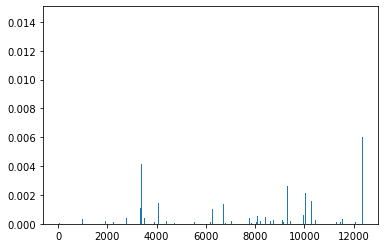

In [118]:
from matplotlib import pyplot
# plot feature importance
pyplot.bar([x for x in range(len(imp))], imp)
pyplot.show()

In [119]:
df = pd.DataFrame(data=tfidf_features_names,columns=["Feature Name"])
df["Feature Value"] = imp
print(len(tfidf_features_names),len(imp))

12361 12361


In [120]:
df.tail()

Feature Name  Feature Value
12356          yes       0.006609
12357         yoga       0.005485
12358        young       0.004564
12359        youth       0.006035
12360         zone       0.003076

In [121]:
df =df.sort_values(by=["Feature Value"],ascending=False)

In [122]:
df.head()

Feature Name  Feature Value
7898    regardless       0.014361
7507    progresses       0.014237
2803     dictation       0.010986
3344   empowerment       0.009685
10928      calming       0.009398

In [123]:
df = df[:5000]
df.shape

(5000, 2)

In [124]:
top_5k = df.index.tolist()
len(top_5k)

5000

In [125]:
train =X_train_tfidf.todense()
train_tfidf =pd.DataFrame(train)
train_tfidf.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   12351     12352  12353  12354     12355     12356     12357     12358  \
0    0.0  0.004224    1.0    1.0 -1.568878  1.285130  1.054143 -0.660521   
1    0.0  0.004224    1.0    1.0 -1.456522  0.048785  1.425636 -0.374056   
2    0.0  0.004224    1.0    0.0  1.352395  1.475337 -1.917802  0.221709   
3    0.0  0.012531    1.0    0.0  0.210102 -0.188974 -0.153209  0.250079   
4    0.0  0.004224    1.0    1.0  1.652013 -1.235113 -1.156241  0.229320   

      12359     12360  
0  0.009807 -0.076423  
1 -1.071726 -0.076423  
2 -0.416713  1.833459  
3  3.147777 -0.553893  
4 -0.873699 -0.076423  

[5 rows x 12361 columns]

In [126]:
train_tfidf.shape

(35912, 12361)

In [127]:
train_tfidf = train_tfidf.iloc[:,top_5k]
train_tfidf.shape

(35912, 5000)

In [128]:
test = X_test_tfidf.todense()
test_tfidf =pd.DataFrame(test)
test_tfidf = test_tfidf.iloc[:,top_5k]

In [129]:
cv = X_cv_tfidf.todense()
cv_tfidf =pd.DataFrame(cv)
cv_tfidf = cv_tfidf.iloc[:,top_5k]

## Applying Linear SVM

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [06:10<00:00, 46.26s/it]


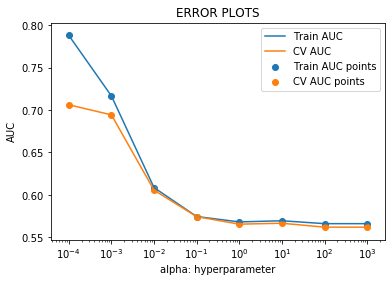

In [130]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm
from sklearn.metrics import roc_auc_score
import math


train_auc = []
cv_auc = []
alpha =[0.0001,0.001,0.01,0.1,1,10,100,1000]

# hyperparameter tuning with l2 reg
for i  in   tqdm(alpha):
    sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced',alpha = i)
    svm = CalibratedClassifierCV(sd, cv= 5)# takes the alpha from the i th list value
    svm.fit(train_tfidf, y_train)# fit the model
    
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    y_train_pred=batch_predict(svm,train_tfidf)
    y_cv_pred=batch_predict(svm,cv_tfidf)
# roc curve
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')
plt.xscale('log')# we take the log in the x axis
plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

### best alpha

In [131]:
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha_values=[math.log(x) for x in alpha]
print('optimal alpha for which auc is maximum : ',optimal_alpha)

optimal alpha for which auc is maximum :  0.0001


## Hyperparameter tuning 

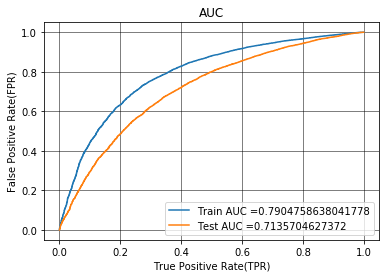

In [132]:
sd = SGDClassifier(penalty = 'l2', class_weight = 'balanced',alpha = optimal_alpha)
svm = CalibratedClassifierCV(sd, cv= 5)# takes the alpha from the i th list value
svm.fit(train_tfidf, y_train)
    

y_train_pred = batch_predict(svm,train_tfidf)    
y_test_pred = batch_predict(svm,test_tfidf)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### best threshold

In [133]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Confusion Matrix

In [134]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print('='*100)

the maximum value of tpr*(1-fpr) 0.5310487734445482 for threshold 0.83
Train confusion matrix
[[ 3949  1494]
 [ 8167 22302]]
Test confusion matrix
[[ 2437  1565]
 [ 6447 15951]]


Text(0.5, 1, 'Confusion Matrix')

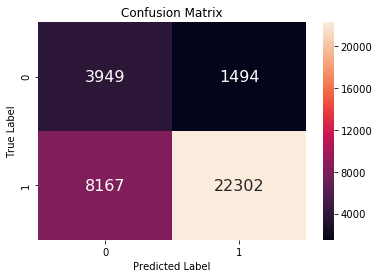

In [135]:
#stackoverflow.com/questions/54018742/valueerror-classification-metrics-cant-handle-a-mix-of-unknown-and-binary-targ
matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(matrix, annot=True, annot_kws={'size':16}, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

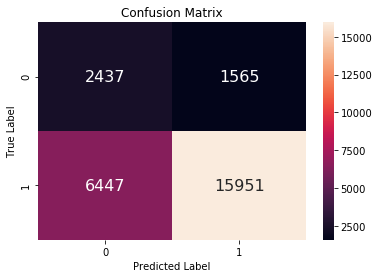

In [136]:
#stackoverflow.com/questions/54018742/valueerror-classification-metrics-cant-handle-a-mix-of-unknown-and-binary-targ
matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(matrix, annot=True, annot_kws={'size':16}, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# KNN on tfidf_w2v

In [137]:
random_grid = {'max_depth': [1,5,10,50],
                  'min_samples_split': [5,10,100,500]}

dt = DecisionTreeClassifier( class_weight='balanced')
clf = GridSearchCV(estimator = dt, param_grid = random_grid, cv = 10, return_train_score=True, scoring = 'roc_auc', n_jobs = -1,verbose =2)
clf.fit(X_train_tfidf_w2v, y_train)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 370.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'m

In [138]:
clf.best_params_

{'max_depth': 5, 'min_samples_split': 5}

In [139]:
train_auc= clf.cv_results_['mean_train_score']
train_auc

array([0.55923724, 0.55923724, 0.55923724, 0.55923724, 0.65801736,
       0.65801736, 0.65772049, 0.65574862, 0.84569313, 0.84396043,
       0.80429091, 0.73405427, 0.99942855, 0.99858199, 0.92739771,
       0.75679459])

In [140]:
cv_auc= clf.cv_results_['mean_test_score']
cv_auc

array([0.55428175, 0.55428175, 0.55428175, 0.55428175, 0.60423287,
       0.60423287, 0.60418153, 0.60419827, 0.55971944, 0.55872125,
       0.57107533, 0.59107598, 0.52924501, 0.52642791, 0.54229142,
       0.58497233])

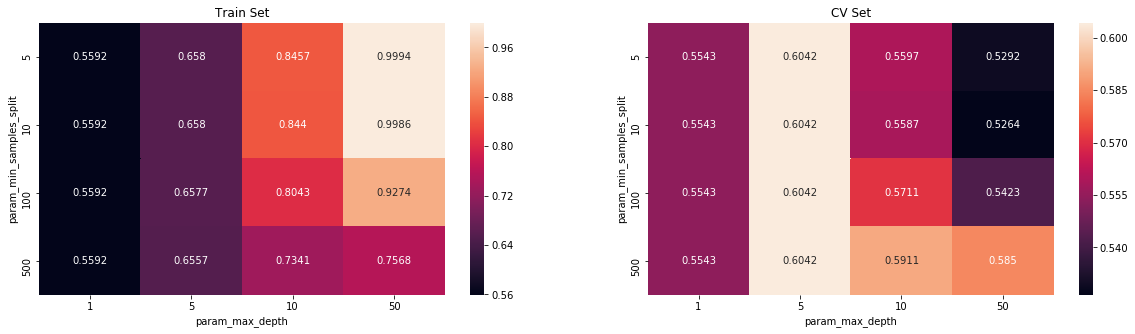

In [141]:
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

# Hyperparameter tuning

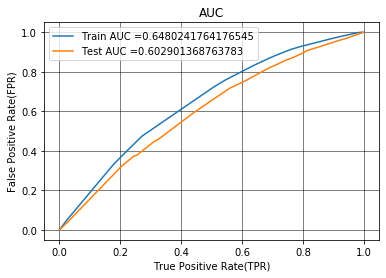

In [153]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


dt = DecisionTreeClassifier(max_depth = 5, min_samples_split= 5)
dt.fit(X_train_tfidf_w2v ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dt, X_train_tfidf_w2v)    
y_test_pred = batch_predict(dt, X_test_tfidf_w2v)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### best threshold

In [154]:

# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## Confusion Matrix

Text(0.5, 1, 'Confusion Matrix')

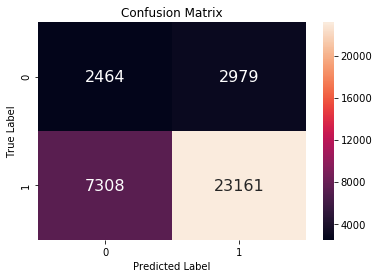

In [155]:
#stackoverflow.com/questions/54018742/valueerror-classification-metrics-cant-handle-a-mix-of-unknown-and-binary-targ
matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(matrix, annot=True, annot_kws={'size':16}, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1, 'Confusion Matrix')

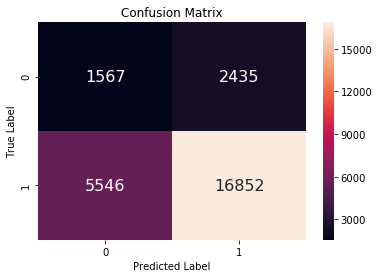

In [156]:
#stackoverflow.com/questions/54018742/valueerror-classification-metrics-cant-handle-a-mix-of-unknown-and-binary-targ
matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(matrix, annot=True, annot_kws={'size':16}, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

## word cloud

In [157]:
fp = []
for i in range(len(y_test)):
    if(y_test[i] == 0) and (y_test_pred[i] <= 1) :
        fp.append(i)

In [158]:
fp_essay =[]
for i in fp:
    fp_essay.append(X_test['essay'].values[i])

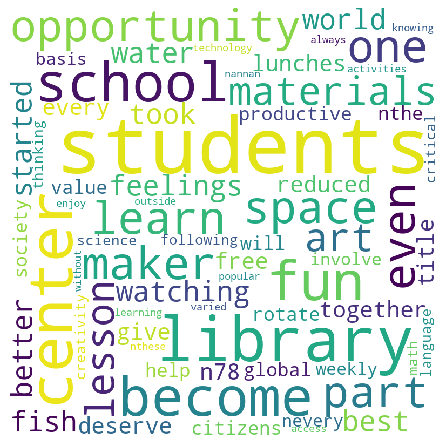

In [159]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### boxplot with price

In [160]:
fp_price=[]
for i in fp:
    fp_price.append(X_test['price'].values[i])

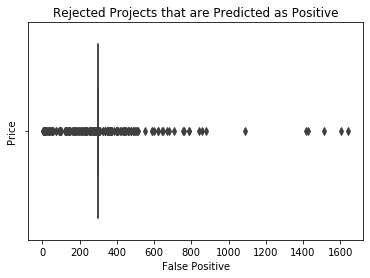

In [161]:
plt.xlabel("False Positive")
plt.ylabel("Price")
plt.title("Rejected Projects that are Predicted as Positive")
sns.boxplot(fp_price)
plt.show()

### pdf of previously posted projects

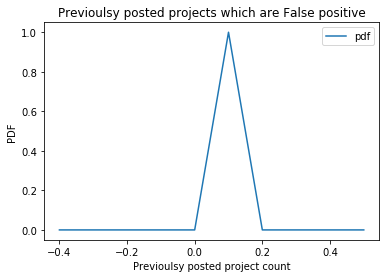

In [162]:
count,bin_edges=np.histogram(X_test['teacher_number_of_previously_posted_projects'].values[i],bins=10,density=True)

#pdf
pdf=count/(sum(count))

p=plt.plot(bin_edges[1:],pdf,label='pdf')

plt.ylabel('PDF')
plt.xlabel('Previoulsy posted project count')
plt.legend()
plt.title('Previoulsy posted projects which are False positive')
plt.show()


# Summary

In [169]:
#how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names= (" Vectorizer ", " Max_depth ", " Min_sample_split "," Test -AUC ")
pt.add_row([" tf-idf ", 10, 500, 61.43])
pt.add_row([" tf-idf_w2v", 5 , 5 ,60.29 ])
print(pt)

pt = PrettyTable()
pt.field_names =("Vectorizer","Model", "hyperparameter","test auc")
pt.add_row(["tfidf for top 5000","Linear SVM",0.0001,71.35])         
print(pt)

+--------------+-------------+--------------------+-------------+
|  Vectorizer  |  Max_depth  |  Min_sample_split  |  Test -AUC  |
+--------------+-------------+--------------------+-------------+
|    tf-idf    |      10     |        500         |    61.43    |
|  tf-idf_w2v  |      5      |         5          |    60.29    |
+--------------+-------------+--------------------+-------------+
+--------------------+------------+----------------+----------+
|     Vectorizer     |   Model    | hyperparameter | test auc |
+--------------------+------------+----------------+----------+
| tfidf for top 5000 | Linear SVM |     0.0001     |  71.35   |
+--------------------+------------+----------------+----------+
